# Examples

## Import libraries

In [1]:
from ctypes import *

import emout
import matplotlib.pyplot as plt
import pandas as pd
from vdsolverf.core import Particle, PhaseGrid

from vdsolverf.emses import get_backtrace, get_probabilities, get_backtraces
import numpy as np
import matplotlib.cm as cm
import scipy.constants as cn
from tqdm.notebook import tqdm

## Load Data

In [2]:
directory = "./"

In [3]:
data = emout.Emout(directory)

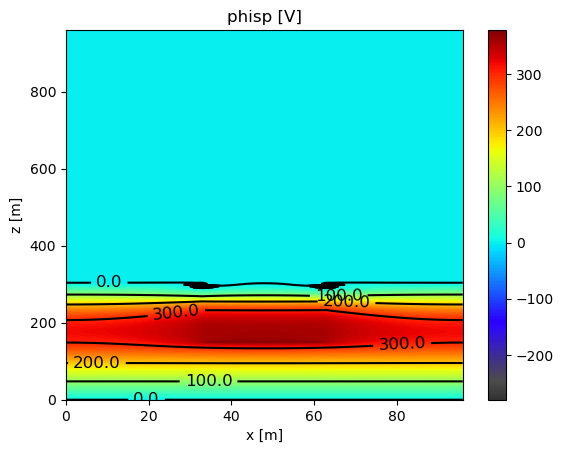

In [4]:
data.phisp[-1, :, 32, :].plot(mode='cmap+cont')

## Create phase grid

In [5]:
NVX = 100
NVZ = 100
phase_grid = PhaseGrid(
    x=32,
    y=32,
    z=130,
    vx=(-100, 100, NVX),
    vy=0,
    vz=(-400, -360, NVZ),
)


In [6]:
phases = phase_grid.create_grid()
particles = []
for phase in phases.reshape(-1, phases.shape[-1]):
    pos = phase[:3].copy()
    vel = phase[3:].copy()
    pcl = Particle(pos, vel)
    particles.append(pcl)

## Phase Probability Distribution Solver

In [7]:
probs, ret_particles = get_probabilities(
    directory=directory,
    ispec=0,
    istep=-1,
    particles=particles,
    dt=0.1,
    use_adaptive_dt=True,
    max_step=30000,
    n_threads=12,
)

progress |++++++++++++++++++++++++++++++++| 100%


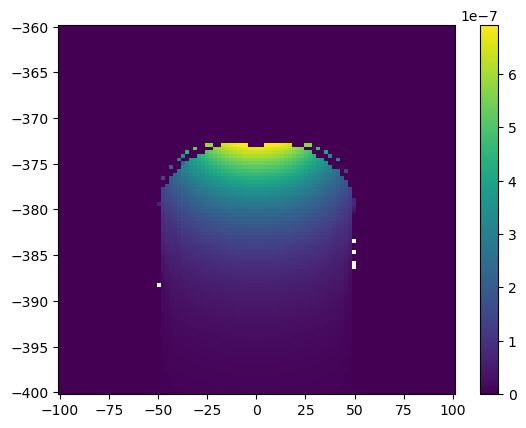

In [8]:
phases = phases.reshape(NVZ, NVX, 6)
VX = phases[:, :, 3]
VZ = phases[:, :, 5]
probs = probs.reshape(NVZ, -1)
plt.pcolormesh(VX, VZ, probs, shading="auto")
plt.colorbar()
plt.show()

## Backtrace

In [9]:
ts, probabirities, positions_list, velocities_list, last_indexes = get_backtraces(
    directory=directory,
    ispec=0,
    istep=-1,
    particles=particles,
    dt=0.1,
    use_adaptive_dt=True,
    max_step=10000,
    n_threads=12,
)

progress |++++++++++++++++++++++++++++++++| 100%


0it [00:00, ?it/s]

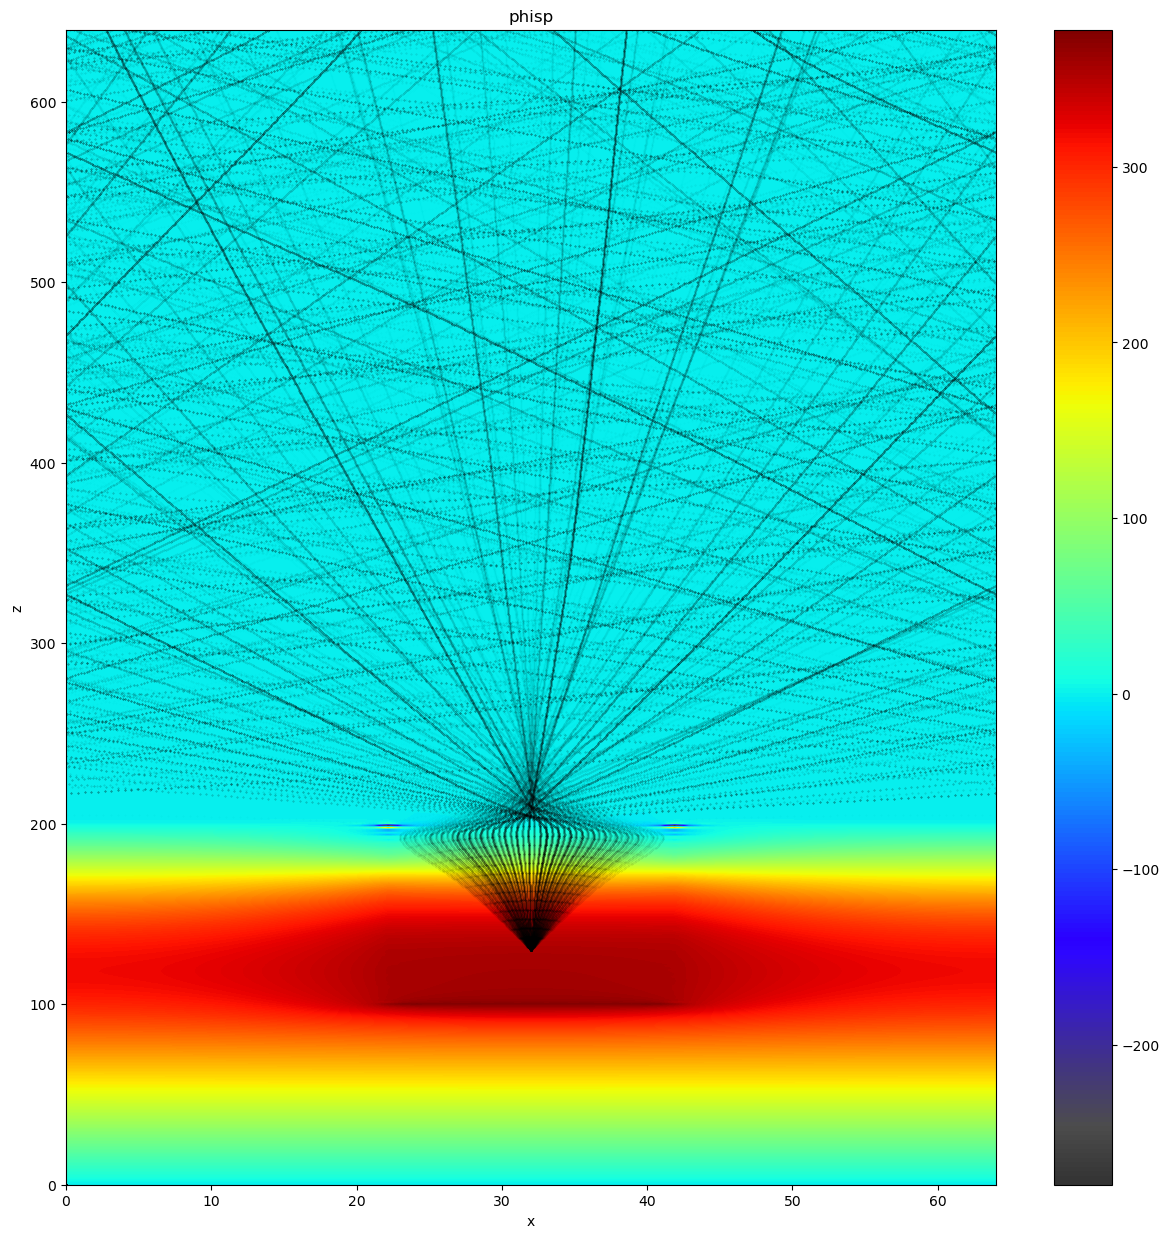

In [10]:
plt.figure(figsize=(15, 15))

data.phisp[-1, :, int(data.inp.ny//2), :].val_si.plot(use_si=False)
maxp = np.array(probabirities).max()
for probabirity, positions in tqdm(zip(probabirities[::17], positions_list[::17])):
    if np.isnan(probabirity):
        continue
    alpha = min(1.0, probabirity / maxp)

    plt.scatter(positions[::5, 0], positions[::5, 2], s=0.1, color='black', alpha=alpha)
